In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [ ]:
(xtrain, ytrain), (xtest, ytest) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
xtrain[1]

In [ ]:
xtrain[1].shape

(28, 28)

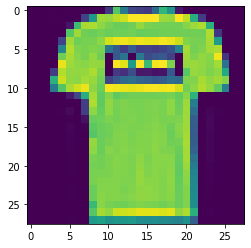

In [ ]:
plt.imshow(xtrain[1])

In [ ]:
xtest[0]

In [ ]:
ytest

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

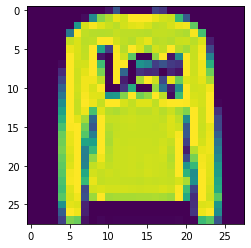

In [ ]:
plt.imshow(xtest[1])

In [ ]:
ytest[1]

2

#classification of ytest values
0 -> t-shirt/top
1 -> Trouser
2 -> Pullover
3 -> Dress
4 -> Coat
5 -> Sandal
6 -> Shirt
7 -> Sneaker
8 -> Bag
9 -> Ankle boot

In [ ]:
#scaling the pixel size
xtrain = xtrain / 255
xtest = xtest / 255

In [ ]:
xtrain.shape

(60000, 28, 28)

In [ ]:
ytrain

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
#model building
model = Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

#add output layer

model.add(Dense(10, activation = 'softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(xtrain, ytrain, epochs = 22, validation_split = 0.20)

Epoch 1/22
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5141 - accuracy: 0.8182 - val_loss: 0.4495 - val_accuracy: 0.8380
Epoch 2/22
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3792 - accuracy: 0.8611 - val_loss: 0.3700 - val_accuracy: 0.8670
Epoch 3/22
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3451 - accuracy: 0.8732 - val_loss: 0.3503 - val_accuracy: 0.8745
Epoch 4/22
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3177 - accuracy: 0.8825 - val_loss: 0.3375 - val_accuracy: 0.8798
Epoch 5/22
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3019 - accuracy: 0.8869 - val_loss: 0.3450 - val_accuracy: 0.8763
Epoch 6/22
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2872 - accuracy: 0.8925 - val_loss: 0.3359 - val_accuracy: 0.8794
Epoch 7/22
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2706 - accuracy: 0.8994 - val_loss: 0.3311 - val_accuracy:

In [ ]:
yprob = model.predict(xtest)

313/313 [==============================] - 0s 1ms/step


In [ ]:
yprob[0]

array([2.5166707e-12, 5.4519815e-09, 8.2813346e-11, 2.0847565e-10,
       7.4046780e-10, 5.2866144e-06, 3.8222909e-09, 1.0013238e-03,
       1.3149183e-12, 9.9899328e-01], dtype=float32)

In [ ]:
ypred = yprob.argmax(axis=1)

In [ ]:
ypred

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1000
           1       0.99      0.98      0.98      1000
           2       0.81      0.81      0.81      1000
           3       0.91      0.87      0.89      1000
           4       0.79      0.85      0.82      1000
           5       0.98      0.95      0.97      1000
           6       0.72      0.70      0.71      1000
           7       0.93      0.98      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.97      0.94      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



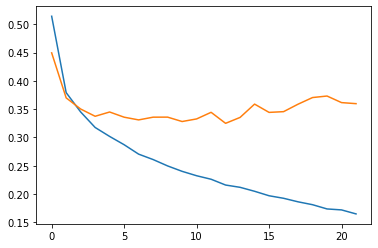

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])